# 6. 탐욕법(Greedy)

# 6-1. 체육복
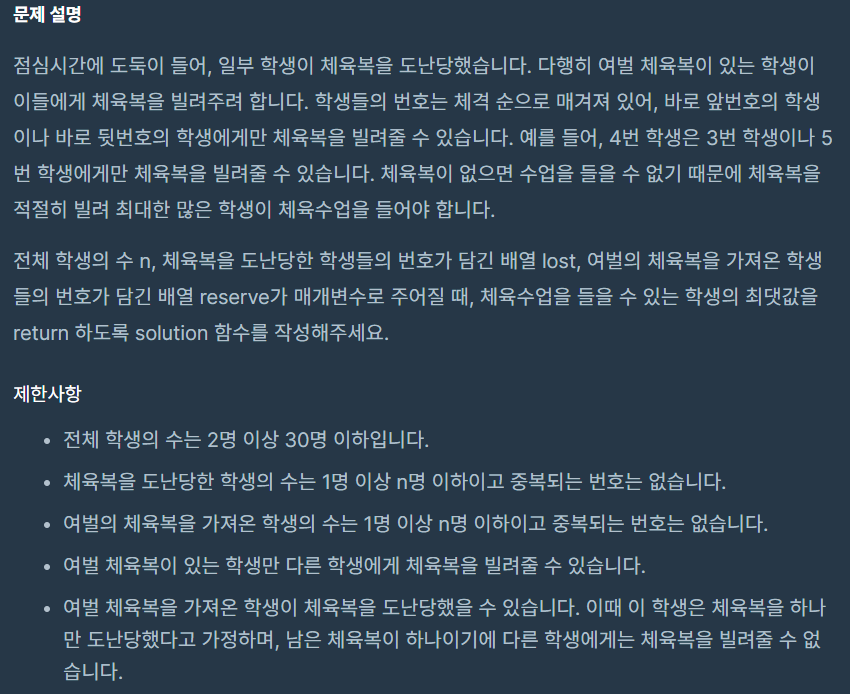

### 내 풀이
- heapq로 풀었는데 .. 반례 잡는게 어려웠음

In [5]:
from heapq import heapify, heappop, heappush

def solution(n, lost, reserve):
    
    both = set(lost) & set(reserve)
    lost = list(set(lost) - both)
    reserve = list(set(reserve) - both)
    answer = n - len(lost)
    
    print(lost)
    print(reserve)
    
    heapify(lost)
    heapify(reserve)
    
    while lost and reserve:
        lost_now = heappop(lost)
        reserve_now = heappop(reserve)
        if lost_now == reserve_now + 1 or lost_now == reserve_now - 1:
            answer += 1
        elif lost_now > reserve_now + 1:
            heappush(lost, lost_now)
        elif lost_now < reserve_now - 1:
            heappush(reserve, reserve_now)
        elif lost_now == reserve_now:
            answer += 1
    
    return answer

### 상위 코드 1
- set 안쓰고 중복 제거 깔끔

In [ ]:
def solution(n, lost, reserve):
    _reserve = [r for r in reserve if r not in lost]
    _lost = [l for l in lost if l not in reserve]
    
    for r in _reserve:
        f = r - 1 # forward
        b = r + 1 # behind
        
        if f in _lost:
            _lost.remove(f)
        elif b in _lost:
            _lost.remove(b)
            
    return n - len(_lost)

## 6-2. 조이스틱
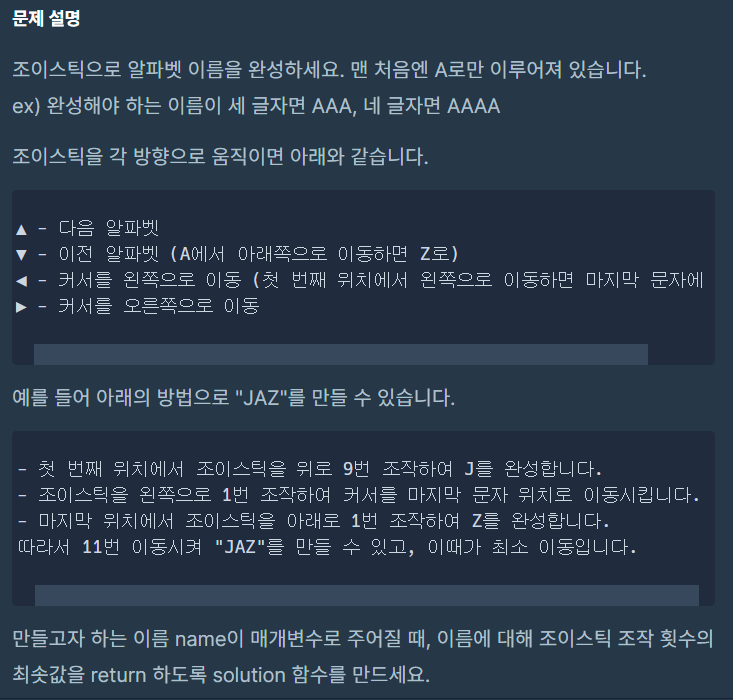

### 내 풀이
- 못풀었지만 내가 생각한 풀이법
- 처음 위치에서 시작해서 앞으로 가는 경우, 뒤로 가는 경우를 매번 고려해서
    모든 값에 도착하게 되는 경로의 수를 구함
-> 문자 간 이동 횟수의 min 값
- +각 문자를 바꿔주는 횟수의 합


### 상위 코드 1
- 이해 안됨 !! ㅎㅎ 
- 이문제가 왜 그리디일까용

In [ ]:
def solution(name):
    count=0
    alpha='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    d={}
    indexes=[]
    current_idx=0
    n=len(name)
    
    for i in range(len(alpha)):
        d[alpha[i]]=min(i,26-i) 
    
    #print(d)
    for i in range(n):
        num=d[name[i]]
        count+=num
        if num !=0 :
            indexes.append(i)
    
    while True:
        if len(indexes)==0:
            break
        min_dist=99
        min_idx=0
        for it in indexes:
            min_dist2=min(abs(it-current_idx),n-abs(it-current_idx))
            if min_dist2 < min_dist:
                min_dist=min_dist2
                min_idx=it
        count+=min_dist
        indexes.remove(min_idx)
        current_idx = min_idx

    return count

# 7. 동적계획법(Dynamic Programming)

## 7-1. N으로 표현
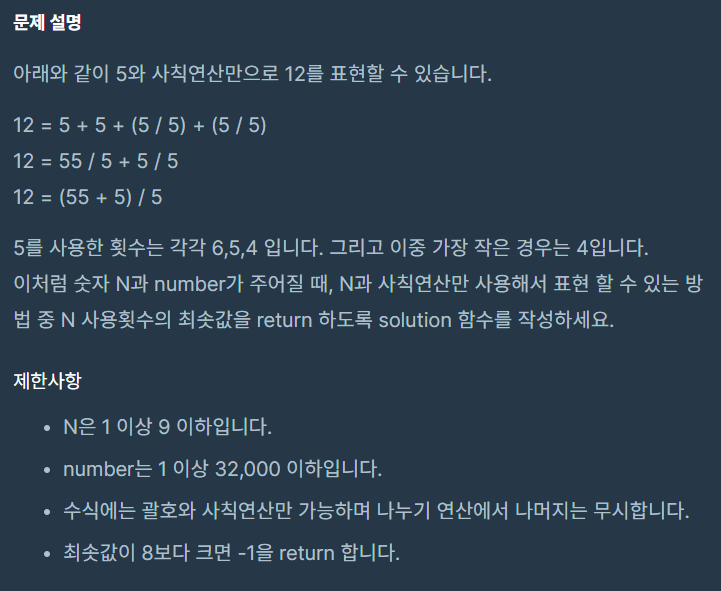

### 내 풀이
- 정확도는 100퍼인데 효율성이 쓰레기
- 사실 어떤 알고리즘으로 해야될지 모르겠어서 그냥 무식하게 구했음

In [ ]:
import math

def solution(n):
    answer = ''
    nums = ['1', '2', '4']
    array = ['1', '2', '4']
    
    len_array = 3
    count = 1
    while True:
        if len_array >= n:
            return array[n - 1]
        else:
            n -= len_array
            temp = []
            for j in nums:
                temp += [j + i for i in array]
            count += 1
            array = temp
            len_array = 3 ** count
            # print(len_array)

# 8. 깊이/너비 우선 탐색(DFS/BFS)

## 8-1. 타겟 넘버
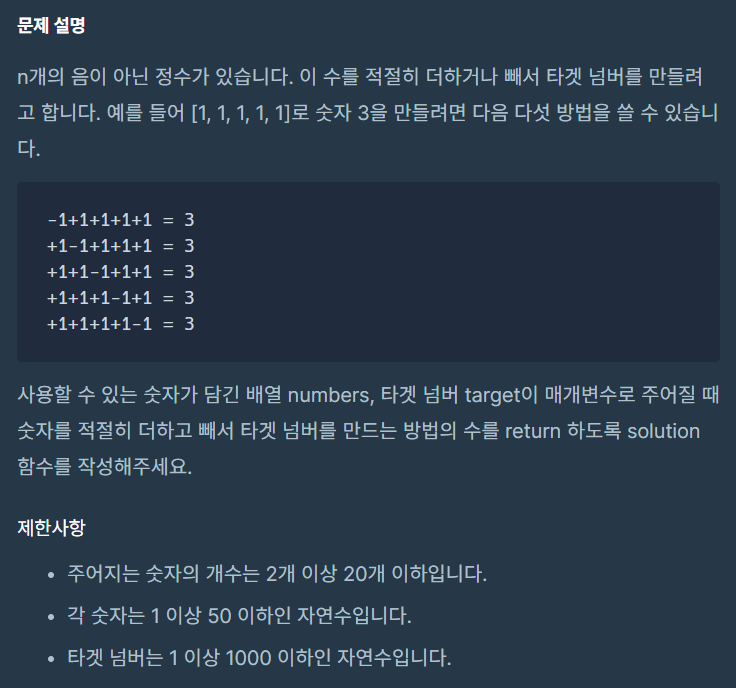

### 내 풀이
- 사실상 내 풀이라고 할 수 없다..
- 접근 방법을 잘 몰랐음
- 완전탐색 풀이법인듯

In [ ]:
def solution(numbers, target):
    answer = 0
    
    current_list = [numbers[0], -numbers[0]]
    
    for i in range(1, len(numbers)):
        next_number = numbers[i]
        next_list = []
        for num in current_list:
            next_list.append(num + next_number)
            next_list.append(num - next_number)
        current_list = next_list
        
    for x in current_list:
        if x == target:
            answer += 1
        
    return answer

### 상위 코드 1
- 재귀함수를 아름답게 이용

In [ ]:
def solution(numbers, target):
    if not numbers and target == 0:
        return 1
    elif not numbers:
        return 0
    else:
        return solution(numbers[1:], target - numbers[0]) + solution(numbers[1:], target + numbers[0])

### 상위 코드 2
- product 이용
- 두 개 이상의 리스트의 모든 조합을 구함
- count로 바로 정답 리턴

In [2]:
from itertools import product

def solution(numbers, target):
    l = [(x, -x) for x in numbers]
    s = list(map(sum, product(*l)))
    
    return s.count(target)

### 상위 코드 3
- DFS 함수 구현

In [ ]:
answer = 0

def DFS(idx, numbers, target, value):
    global answer
    N = len(numbers)
    
    if idx == N and target == value:
        answer += 1
        return 
    if idx == N:
        return
    
    DFS(idx + 1, numbers, target, value + numbers[idx])
    DFS(idx + 1, numbers, target, value - numbers[idx])
    
def solution(numbers, target):
    global answer
    DFS(0, numbers, target, 0)
    return answer

## 8-2. 네트워크
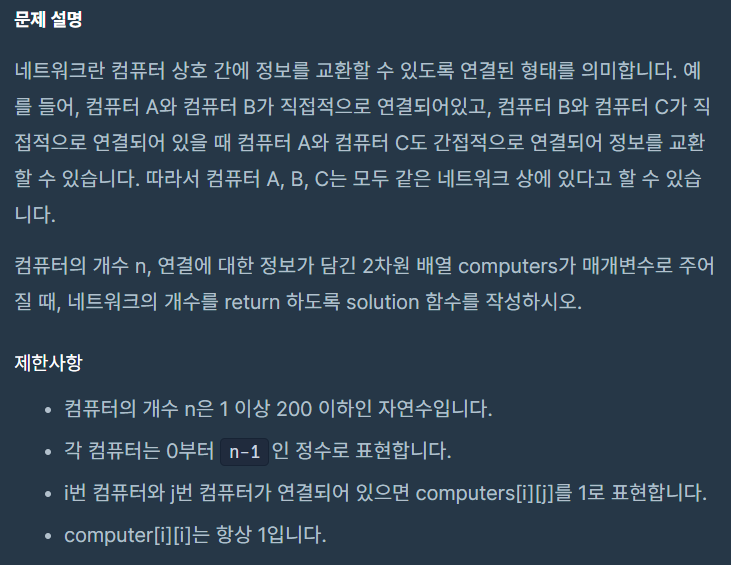